In [17]:
import requests
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [18]:
# Function to fetch data from World Bank API with retry logic
def fetch_data_with_retry(country_code, indicator_code, start_year, end_year, retries=3):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_code}?date={start_year}:{end_year}&format=json"
    for attempt in range(retries):
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if 'message' in data[0] and data[0]['message'][0]['id'] == "120":
                print("Invalid indicator code. Please check the indicator.")
                return None
            return data
        else:
            print(f"Error: {response.status_code}. Retrying...")
            time.sleep(2)
    print("Failed to fetch the data after multiple attempts.")
    return None

In [19]:
indicators = [
    "NV.AGR.TOTL.ZS",  # Agriculture, forestry, and fishing, value added (% of GDP)
    "AG.LND.ARBL.HA.PC",  # Arable land (hectares per person)
    "EN.ATM.CO2E.PC",  # CO2 emissions (metric tons per capita)
]

# Fetch data for a specific country and time period
country_code = "USA"
start_year = 2010
end_year = 2023

In [20]:
# Dictionary to store data
data_dict = {}

# Fetch and store data for each indicator
for indicator in indicators:
    data = fetch_data_with_retry(country_code, indicator, start_year, end_year)
    if data:
        indicator_name = data[1][0]['indicator']['value']
        # Extracting years and values separately
        years = [entry['date'] for entry in data[1]]
        values = [entry['value'] for entry in data[1]]
        data_dict[indicator_name] = values

# Create a DataFrame with the years as the index
df = pd.DataFrame(data_dict, index=years)
df.index.name = 'Year'
df = df.sort_index()  # Sort by year
df

,"Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (hectares per person),CO2 emissions (metric tons per capita)
Year,,,
2010,1.029437,0.509870,17.431737
2011,1.200559,0.501830,16.604190
2012,1.149330,0.493847,15.789760
2013,1.318150,0.492164,16.111175
2014,1.168240,0.490283,16.040917
2015,1.028904,0.488388,15.560015
2016,0.937140,0.486551,15.149883
2017,0.940362,0.485162,14.823245
2018,0.898498,0.482614,15.222518


In [21]:
# Display the column names to verify the presence of 'Year'
print(df.columns)

Index(['Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (hectares per person)',
       'CO2 emissions (metric tons per capita)'],
      dtype='object')


In [22]:
# Check if 'Year' is in the columns
if 'Year' not in df.columns:
    # If 'Year' is the index, reset it
    df = df.reset_index()

In [23]:
# Ensure that 'CO2 emissions (metric tons per capita)' column exists
if 'CO2 emissions (metric tons per capita)' in df.columns:
    # Calculate the year-over-year percent change in CO2 emissions
    df['CO2 Emissions Percent Change'] = df['CO2 emissions (metric tons per capita)'].pct_change() * 100
else:
    print("The column 'CO2 emissions (metric tons per capita)' does not exist in the DataFrame.")

# Display the DataFrame to check the new column
df[['Year', 'CO2 emissions (metric tons per capita)', 'CO2 Emissions Percent Change']].head()

/var/folders/53/j4zz68lj2z74j3_lc24q_llc0000gn/T/ipykernel_88046/1559564151.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['CO2 Emissions Percent Change'] = df['CO2 emissions (metric tons per capita)'].pct_change() * 100


,Year,CO2 emissions (metric tons per capita),CO2 Emissions Percent Change
0,2010,17.431737,NaN
1,2011,16.604190,-4.747360
2,2012,15.789760,-4.904964
3,2013,16.111175,2.035592
4,2014,16.040917,-0.436086


In [24]:
def c02emissionpercentchange():

    if 'Year' in df.columns and 'CO2 Emissions Percent Change' in df.columns:
        # Drop rows with NaN values in 'CO2 Emissions Percent Change' to avoid plotting issues
        df_clean = df.dropna(subset=['CO2 Emissions Percent Change'])
    
        plt.figure(figsize=(12, 6))
        plt.plot(df_clean['Year'], df_clean['CO2 Emissions Percent Change'], marker='o', linestyle='-', color='green')
    
        plt.title('CO2 Emissions Percent Change (2010-2023)')
        plt.xlabel('Year')
        plt.ylabel('Percent Change (%)')
        plt.grid(True)
        plt.show()
    else:
        print("Required columns for plotting are missing.")
    return

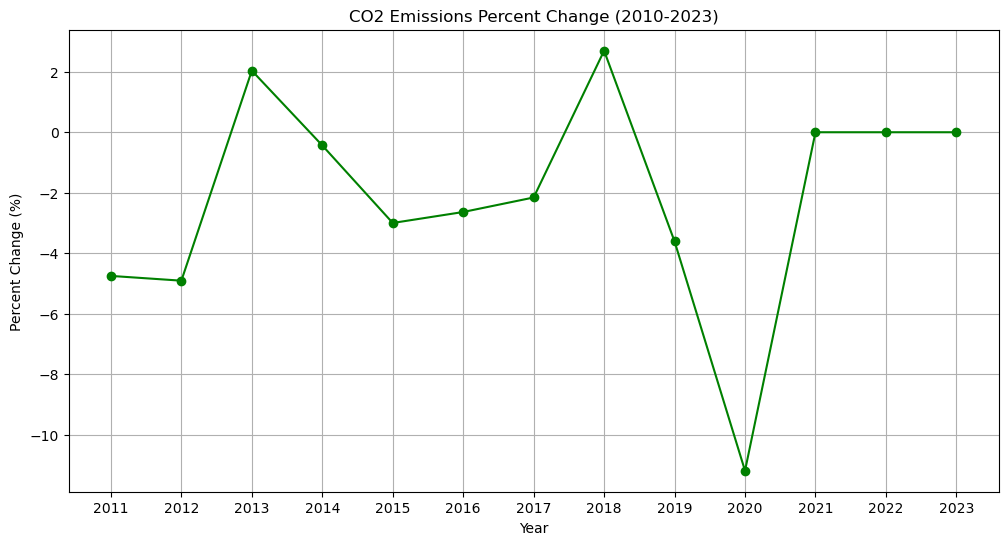

In [25]:
c02emissionpercentchange()

In [26]:
# Ensure that 'Agriculture, forestry, and fishing, value added (% of GDP)' column exists
if 'Agriculture, forestry, and fishing, value added (% of GDP)' in df.columns:
    # Calculate the year-over-year percent change
    df['Agriculture Value Added Percent Change'] = df['Agriculture, forestry, and fishing, value added (% of GDP)'].pct_change() * 100
else:
    print("The column 'Agriculture, forestry, and fishing, value added (% of GDP)' does not exist in the DataFrame.")

# Display the DataFrame to check the new column
df[['Year', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Agriculture Value Added Percent Change']].head()


/var/folders/53/j4zz68lj2z74j3_lc24q_llc0000gn/T/ipykernel_88046/3031986260.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Agriculture Value Added Percent Change'] = df['Agriculture, forestry, and fishing, value added (% of GDP)'].pct_change() * 100


,Year,"Agriculture, forestry, and fishing, value added (% of GDP)",Agriculture Value Added Percent Change
0,2010,1.029437,NaN
1,2011,1.200559,16.622866
2,2012,1.149330,-4.267097
3,2013,1.318150,14.688581
4,2014,1.168240,-11.372722


In [27]:
def agriculturepercentchange():

    if 'Year' in df.columns and 'Agriculture Value Added Percent Change' in df.columns:
        # Drop rows with NaN values in 'Agriculture Value Added Percent Change' to avoid plotting issues
        df_clean = df.dropna(subset=['Agriculture Value Added Percent Change'])
    
        plt.figure(figsize=(12, 6))
        plt.plot(df_clean['Year'], df_clean['Agriculture Value Added Percent Change'], marker='o', linestyle='-', color='blue')
    
        plt.title('Percent Change in Agriculture, Forestry, and Fishing Value Added (% of GDP) Percent Change (2010-2023)')
        plt.xlabel('Year')
        plt.ylabel('Percent Change (%)')
        plt.grid(True)
        plt.show()
    else:
        print("Required columns for plotting are missing.")
    return

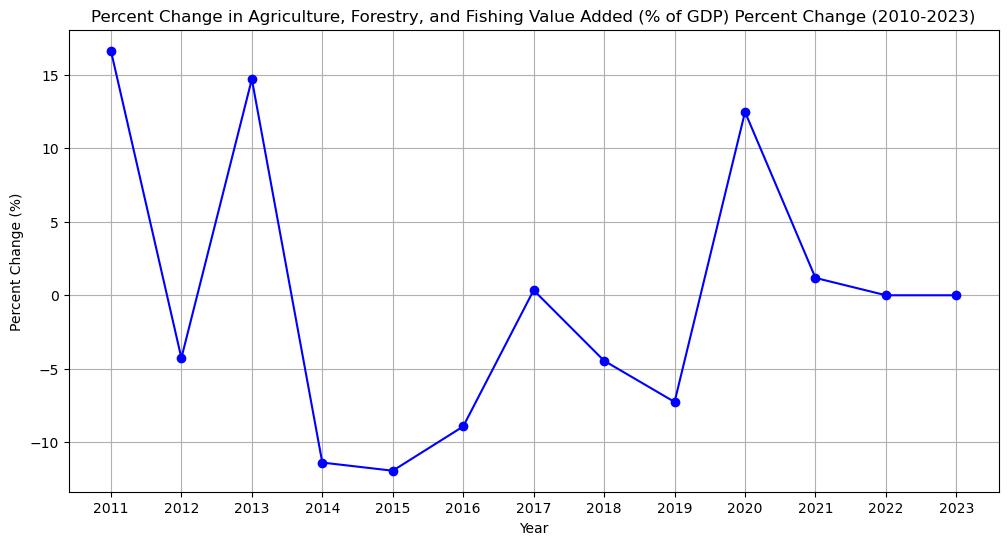

In [28]:
agriculturepercentchange()

In [29]:
# Ensure that the necessary columns exist
if 'CO2 Emissions Percent Change' in df.columns and 'Agriculture Value Added Percent Change' in df.columns:
    # Drop rows with NaN values in either column to ensure accurate plotting
    df_clean = df.dropna(subset=['CO2 Emissions Percent Change', 'Agriculture Value Added Percent Change'])
else:
    print("Required columns for correlation are missing.")

In [30]:
def correlationgraph1():
        plt.figure(figsize=(12, 8))
        plt.scatter(df_clean['CO2 Emissions Percent Change'], df_clean['Agriculture Value Added Percent Change'], marker='o', color='purple')

        for i in range(len(df_clean)):
         plt.text(df_clean['CO2 Emissions Percent Change'].iloc[i], df_clean['Agriculture Value Added Percent Change'].iloc[i], 
             df_clean['Year'].iloc[i], fontsize=9, ha='right')

        plt.title('Correlation Between CO2 Emissions Percent Change and Agriculture Value Added Percent Change (2010-2023)')
        plt.xlabel('CO2 Emissions Percent Change (%)')
        plt.ylabel('Agriculture Value Added Percent Change (%)')
        plt.grid(True)
        plt.show()
        return

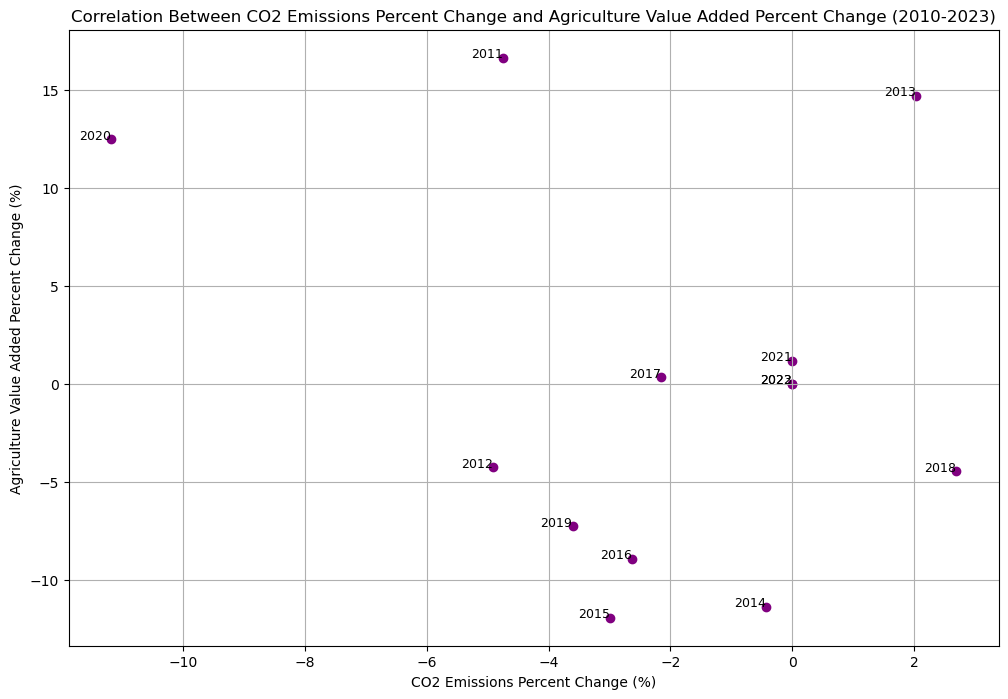

In [31]:
correlationgraph1()

In [32]:
# Ensuring that the necessary columns exist
if 'CO2 Emissions Percent Change' in df.columns and 'Agriculture Value Added Percent Change' in df.columns:
    # Drop rows with NaN values in either column to ensure accurate plotting
    df_clean = df.dropna(subset=['CO2 Emissions Percent Change', 'Agriculture Value Added Percent Change'])
else:
    print("Required columns for plotting are missing.")

In [33]:
def c02emissionvsagriculturevalue():
    
    plt.figure(figsize=(14, 8))

    # CO2 Emissions Percent Change
    plt.plot(df_clean['Year'], df_clean['CO2 Emissions Percent Change'], marker='o', linestyle='-', color='green', label='CO2 Emissions Percent Change')

    # Agriculture Value Added Percent Change
    plt.plot(df_clean['Year'], df_clean['Agriculture Value Added Percent Change'], marker='o', linestyle='-', color='blue', label='Agriculture Value Added Percent Change')

    # Add titles and labels
    plt.title('CO2 Emissions Percent Change vs. Agriculture Value Added Percent Change (2010-2023)')
    plt.xlabel('Year')
    plt.ylabel('Percent Change (%)')
    plt.legend()
    plt.grid(True)
    plt.show()
    return

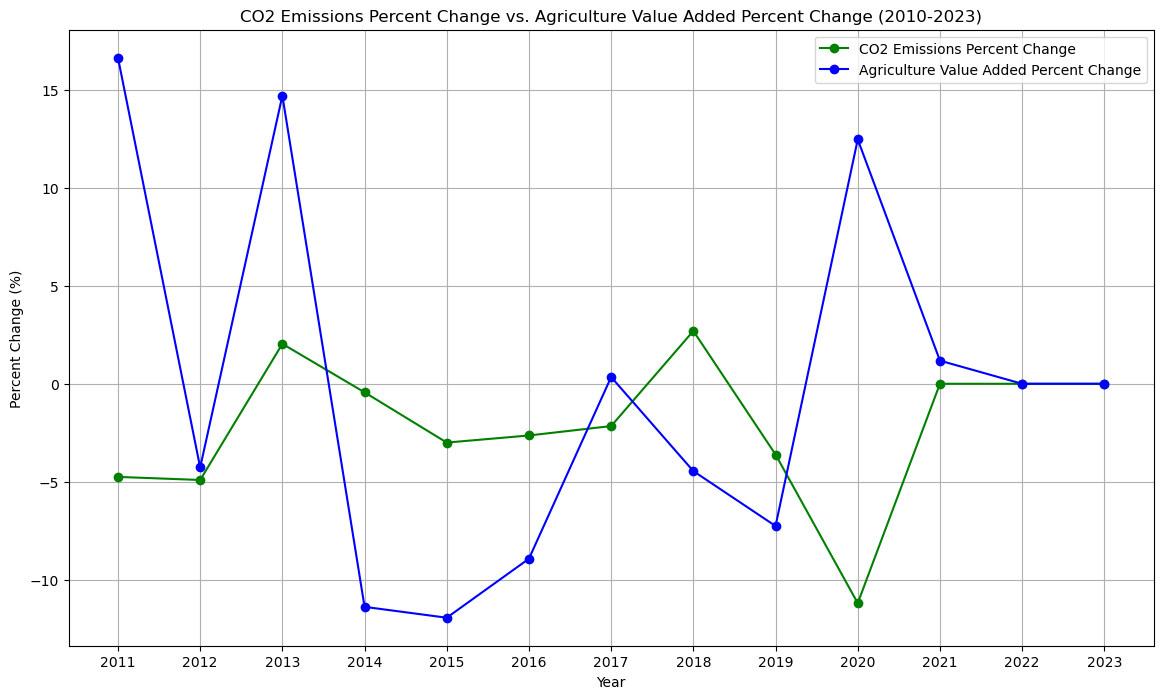

In [34]:
c02emissionvsagriculturevalue()

In [35]:
# Ensure the necessary columns exist
if 'CO2 Emissions Percent Change' in df_clean.columns and 'Agriculture Value Added Percent Change' in df_clean.columns:
    # Extract the relevant data
    x = df_clean['CO2 Emissions Percent Change']
    y = df_clean['Agriculture Value Added Percent Change']
    
    # Calculate the regression line and correlation coefficient
    regression_result = linregress(x, y)
    slope = regression_result.slope
    intercept = regression_result.intercept
    r_value = regression_result.rvalue
    p_value = regression_result.pvalue
    std_err = regression_result.stderr
    
    # Display the results
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"Correlation Coefficient (r-value): {r_value}")
    print(f"P-value: {p_value}")
    print(f"Standard Error: {std_err}")
else:
    print("Required columns for correlation calculation are missing.")

Slope: -0.6121979709310515
Intercept: -1.5385176671433818
Correlation Coefficient (r-value): -0.23221999406993596
P-value: 0.4451982881879444
Standard Error: 0.7731405616496101


In [36]:
def correlationregressiongraph():
    

        # Scatter plot with regression line
        plt.figure(figsize=(12, 8))
        plt.scatter(x, y, marker='o', color='purple', label='Data Points')

        # Plot the regression line
        plt.plot(x, slope * x + intercept, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

        # Annotate each point with the corresponding year
        for i in range(len(df_clean)):
         plt.text(x.iloc[i], y.iloc[i], df_clean['Year'].iloc[i], fontsize=9, ha='right')

        plt.title('Correlation Between CO2 Emissions Percent Change and Agriculture Value Added Percent Change (2010-2023)')
        plt.xlabel('CO2 Emissions Percent Change (%)')
        plt.ylabel('Agriculture Value Added Percent Change (%)')
        plt.legend()
        plt.grid(True)
        plt.show()

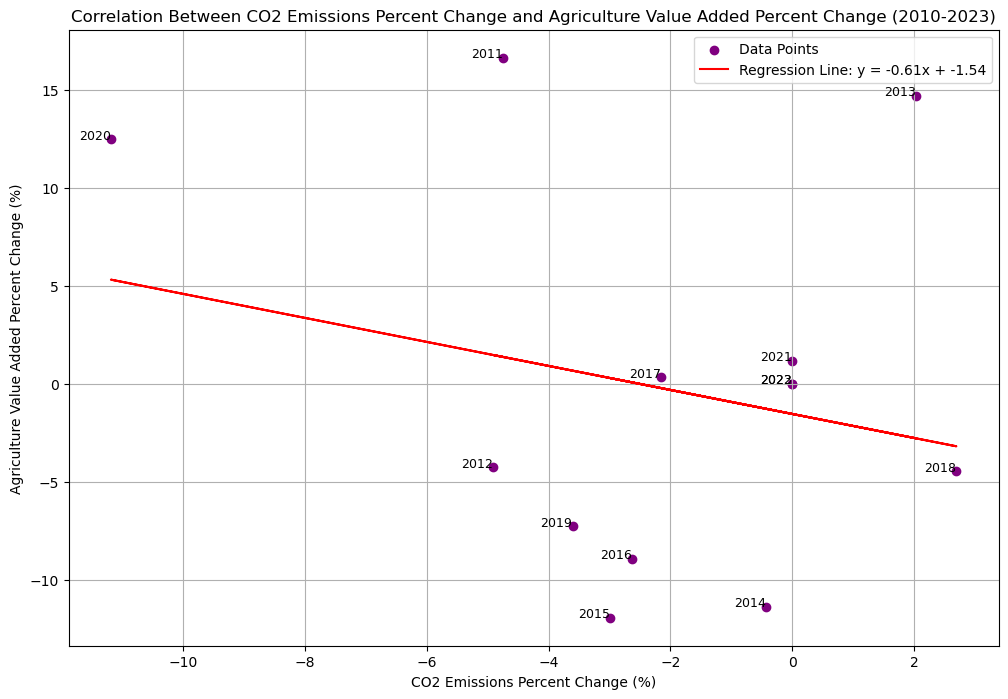

In [163]:
correlationregressiongraph()